In [332]:
import json
from src.modules.fullDose import *
from src.main import *

a = FullDoseDT()


In [333]:
print(len(a.train_data), len(a.test_data), len(a.validate_data), len(a.data))


704 234 235 1173


In [334]:
a.train()


In [335]:
print(len(a.decision_list))


221


In [336]:
a.test()
a.test(a.validate_data)
a.test(a.train_data)


决策树的正确率： 93.58974358974359 %
决策树的正确率： 92.34042553191489 %
决策树的正确率： 97.44318181818183 %


In [337]:
len(a.decision_list)
complete_tree = pd.DataFrame(a.decision_list)
write_to_excel(complete_tree, 'excel/t4.1_complete_tree.xlsx')


In [338]:
a.cut()


In [339]:
print(len(a.decision_list))
a.test()
a.test(a.validate_data)
a.test(a.train_data)


56
决策树的正确率： 92.73504273504274 %
决策树的正确率： 94.04255319148936 %
决策树的正确率： 93.18181818181817 %


In [340]:
import pandas as pd


In [341]:
cut_tree = pd.DataFrame(a.decision_list)
write_to_excel(cut_tree, 'excel/t4.2_cut_tree.xlsx')


In [342]:
Ps = {
    'DC': 0,
    'OS': 0,
    'IS': 0,
    'BC': 0,
    'CC': 0,
}
for path in a.decision_list:
    for attr in Ps.keys():
        if attr in path.keys():
            Ps[attr] += 1


count = np.array(list(Ps.values()))

y = count / 56


In [343]:
Ps = {
    'DC': 0,
    'OS': 0,
    'IS': 0,
    'BC': 0,
    'CC': 0,
}
for path in a.decision_list:
    for attr in Ps.keys():
        if attr in path.keys():
            Ps[attr] += 1


count = np.array(list(Ps.values()))

ys = count / 56

print(ys)


[1.         0.67857143 0.875      0.39285714 0.10714286]


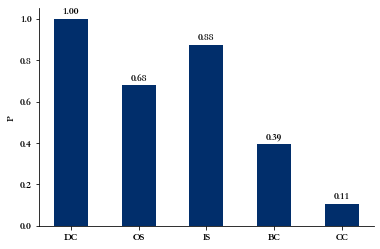

In [344]:
fig, axes = plt.subplots()
xs = list(Ps.keys())
axes.bar(xs, ys, width=0.5, color="#012E6B")
axes.spines[['right', 'top']].set_visible(False)
for x, y in zip(xs, ys):
    plt.text(x, y+0.02, '%.2f' % y, ha="center")

axes.set_ylabel('P')
# axes.set_xlabel('条件属性')

plt.savefig('c5.svg', format="svg", bbox_inches="tight")
plt.show()


In [345]:
Ps = [0 for _ in range(len(a.decision_list))]


In [346]:
for node in a.data:
    for i, path in enumerate(a.decision_list):
        is_hit = True
        for attr, v in path.items():
            if attr == 'label':
                continue
            if v != node[attr]:
                is_hit = False
                # break
        if(is_hit):
            Ps[i] += 1
            # break


In [347]:
Ps

[10,
 20,
 8,
 5,
 1,
 0,
 0,
 3,
 0,
 1,
 5,
 11,
 0,
 0,
 10,
 4,
 2,
 0,
 1,
 0,
 4,
 2,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 6,
 7,
 7,
 19,
 1,
 5,
 5,
 5,
 7,
 40,
 0,
 4,
 0,
 4,
 0,
 0,
 0,
 0,
 8,
 0,
 0,
 1,
 3,
 2,
 21,
 145,
 793]

In [348]:
cluster = [[] for _ in range(0, 6)]
for i, path in enumerate(a.decision_list):
    cluster[path['label'] - 1].append(Ps[i])

group_count = [len(g) for g in cluster]



In [349]:
cluster = [[count for count in label if count > 0] for label in cluster]

total = sum([sum(g) for g in cluster])


[2.4]
[4.8 5.8 6.8]
[ 9.2 10.2 11.2 12.2 13.2]
[15.6 16.6 17.6 18.6 19.6 20.6 21.6 22.6]
[25. 26. 27. 28. 29. 30. 31. 32.]
[34.4 35.4 36.4 37.4 38.4 39.4 40.4 41.4 42.4 43.4 44.4]


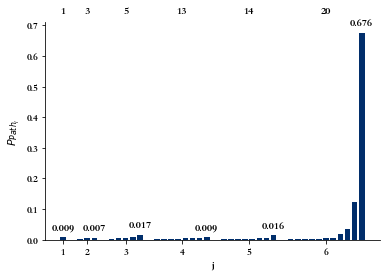

In [350]:
fig, axes = plt.subplots()

x_offset = 0
width = 0.8
group_gap = 2

x_ticks = []

max_y = 0

for i, group in enumerate(cluster):
    xs = np.arange(0, len(group)) + x_offset + width / 2 + group_gap
    print(xs)
    ys = [count / total for count in sorted(group)]
    x_offset = xs[-1]

    tick = (xs[-1] + xs[0]) / 2
    x_ticks.append(tick)

    axes.text(xs[-1], ys[-1] + 0.02, '%.3f' % ys[-1], ha="center", fontsize=11)

    if ys[-1] > max_y:
        max_y = ys[-1]

    axes.bar(xs, ys, width=0.8, color="#012E6B")

for i, count in enumerate(group_count):
    axes.text(x_ticks[i], max_y + 0.06, count, ha="center", fontsize=11)

axes.set_xticks(x_ticks)
axes.set_xticklabels([1, 2, 3, 4, 5, 6])

axes.set_ylabel(r'$P_{Path_l}$', size=11)
axes.set_xlabel(r'j', size=11)

# plt.title('图6 决策路径的分布概率', y=-0.3, size=11)


axes.spines[['top', 'right']].set_visible(False)

plt.savefig('c6.svg', format="svg", bbox_inches="tight")


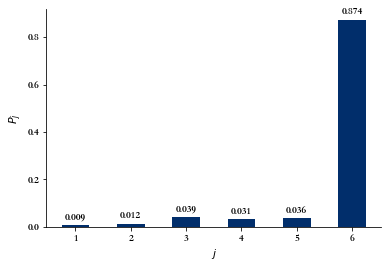

In [351]:
hierarchical_risk = [sum(g) / total for g in cluster]

fig, ax = plt.subplots()
ys = hierarchical_risk
xs = np.arange(1, len(ys) + 1)

ax.spines[['right', 'top']].set_visible(False)
for x, y in zip(xs, ys):
    plt.text(x, y+0.02, '%.3f' % y, ha="center")

ax.set_xlabel(r'$j$', fontsize=11)
ax.set_ylabel(r'$P_j$', fontsize=11)


ax.bar(xs, ys, width=0.5, color="#012E6B")

# plt.title('图7 线路脆弱性层次风险', y=-0.3, size=11)

plt.savefig("c7.svg", format="svg", bbox_inches="tight")


In [352]:
with open("src/data/all_Es.json") as f:
    all_Es = json.load(f)
Es = [item['E'] for item in all_Es]


In [353]:
'''
clusters, nodes = Report.cluster_nodes_by(all_Es, 'E', 'E', layers=50)
with open("src/data/all_Es_cluster_50.json", 'w') as f:
    json.dump(clusters, f)
'''


'\nclusters, nodes = Report.cluster_nodes_by(all_Es, \'E\', \'E\', layers=50)\nwith open("src/data/all_Es_cluster_50.json", \'w\') as f:\n    json.dump(clusters, f)\n'

In [354]:
with open("src/data/all_Es_cluster_50.json") as f:
    clusters = json.load(f)


In [355]:
Ps = [len(cls) / len(all_Es) for cls in clusters]


In [356]:
def find_ind(v):
    for ind, group in enumerate(clusters):
        if v in group:
            return ind


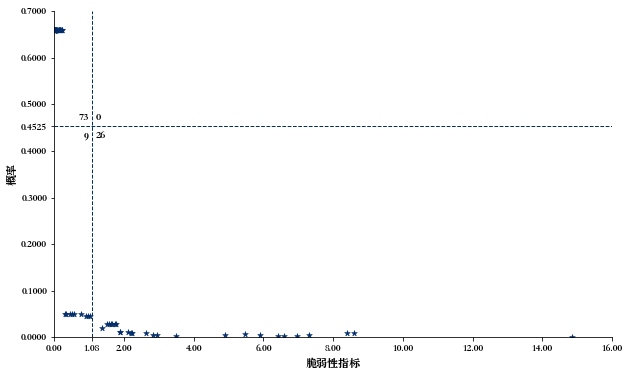

In [357]:
with open("src/data/Es_20.json") as f:
    Es_20 = json.load(f)


xs = [item['E'] for item in Es_20]
ys = [Ps[find_ind(x)] for x in xs]

xs_m = sum(xs) / len(xs)
ys_m = sum(ys) / len(ys)

xys = list(zip(xs, ys))
hh = [xy for xy in xys if xy[0] > xs_m and xy[1] > ys_m]
hl = [xy for xy in xys if xy[0] > xs_m and xy[1] <= ys_m]
lh = [xy for xy in xys if xy[0] <= xs_m and xy[1] > ys_m]
ll = [xy for xy in xys if xy[0] <= xs_m and xy[1] <= ys_m]

fig, axe = plt.subplots(figsize=(10, 6))
axe.scatter(xs, ys, marker='*', c="#012E6B", linewidths=0.5)
axe.axhline(y=ys_m, c='#012E6B', ls='--', lw=1)
axe.axvline(x=xs_m, c='#012E6B', ls='--', lw=1)

x_ticks = list(axe.get_xticks())
x_ticks.append(xs_m)
axe.set_xticks(x_ticks)
y_ticks = list(axe.get_yticks())
y_ticks.append(ys_m)
axe.set_yticks(y_ticks)

axe.set_xlabel('脆弱性指标', fontsize=11)
axe.set_ylabel('概率', fontsize=11)

axe.spines[['right',  'top']].set_visible(False)
count = str(len(lh)) + '  ' + str(len(hh)) + '\n' + \
    str(len(ll)) + '  ' + str(len(hl))
axe.text(xs_m-0.1, ys_m+0.01, str(len(lh)), va="bottom", ha="right", fontsize=11)
axe.text(xs_m+0.1, ys_m+0.01, str(len(hh)), va="bottom", ha="left", fontsize=11)
axe.text(xs_m-0.1, ys_m-0.01, str(len(ll)), va="top", ha="right", fontsize=11)
axe.text(xs_m+0.1, ys_m-0.01, str(len(hl)), va="top", ha="left", fontsize=11)
axe.set_xlim(0, None)
axe.set_ylim(0, None)

# plt.title('图8 2020年各节点脆弱性的概率水平', y=-0.2, size=11)
plt.savefig('c8.svg', format="svg", bbox_inches="tight")

plt.show()
